## kNN - k Nearest Neighbours Classifier
### Input:
* train: dataset of known labels (NxM)
* labels: dataset labels (1xM)
* test: vector to compare to existing dataset (1xN)
* k: number of neighbors (should be an odd number)

### Output:     
* the most popular class label

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# kNN classifier
def classify(train, labels, test, k):
    n = train.shape[0]
    diffMat = train - np.tile(test, (n, 1))
    sqDiffMat = diffMat**2
    sqDist = sqDiffMat.sum(axis=1)
    dist = sqDist**0.5
    sortedInx = dist.argsort()
    classCount = {}
    for i in range(k):
        label = labels[sortedInx[k]]
        classCount[label] = classCount.get(label,0) + 1
    sortedClassCount = sorted(classCount.items(), key=lambda x:x[1], reverse=True)
    return sortedClassCount[0][0]

# Data used here come from Peter Harrington's "Machine Learning in Action"
def inputData(filename):
    f = open(filename)
    lines = f.readlines()
    nlines = len(lines)
    retMat = np.zeros((nlines, 3))
    labels = []
    idx = 0
    for line in lines:
        line = line.strip().split()
        retMat[idx, :] = line[:-1]
        labels.append(line[-1])
        idx += 1
    labels = np.array(labels)
    return retMat, labels

(-1, 25.0)

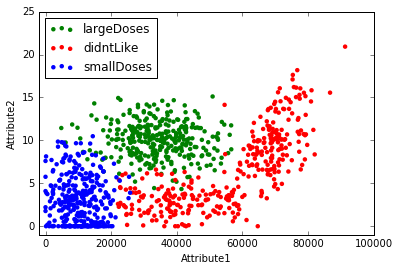

In [3]:
# Simple visualization
dataset, labels = inputData('datingTestSet.txt')
colormap = {'didntLike':'red','largeDoses':'green','smallDoses':'blue'}
for k,color in colormap.items():
    plt.scatter(dataset[np.where(labels==k),0], dataset[np.where(labels==k),1], 
                c=color, label=k, edgecolors='none')
plt.legend(loc=2)
plt.xlabel('Attribute1')
plt.ylabel('Attribute2')
plt.xlim(xmin=-2000)
plt.ylim(ymin=-1)

In [4]:
def normalize(dataset):
    minVals = dataset.min(0)
    maxVals = dataset.max(0)
    ranges = maxVals - minVals
    normData = (dataset - minVals)/ranges
    return normData, ranges, minVals

In [5]:
def testAccuracy():
    testRatio = 0.1
    dataset,labels = inputData('datingTestSet.txt')
    normData, ranges, minVals = normalize(dataset)
    n = normData.shape[0]
    samp = np.random.choice(n, int(0.1*n), replace=False)
    trainData = np.delete(normData,samp,0)
    trainLabels = np.delete(labels,samp)
    testData = normData[samp]
    testLabels = labels[samp]
    correct = 0
    for i in range(len(testLabels)):
        label = classify(trainData, trainLabels, testData[i], 5)
        if label == testLabels[i]:
            correct += 1
    print("Test accuracy = %4.3f" % (correct/len(testLabels)))

In [8]:
testAccuracy()

Test accuracy = 0.930
